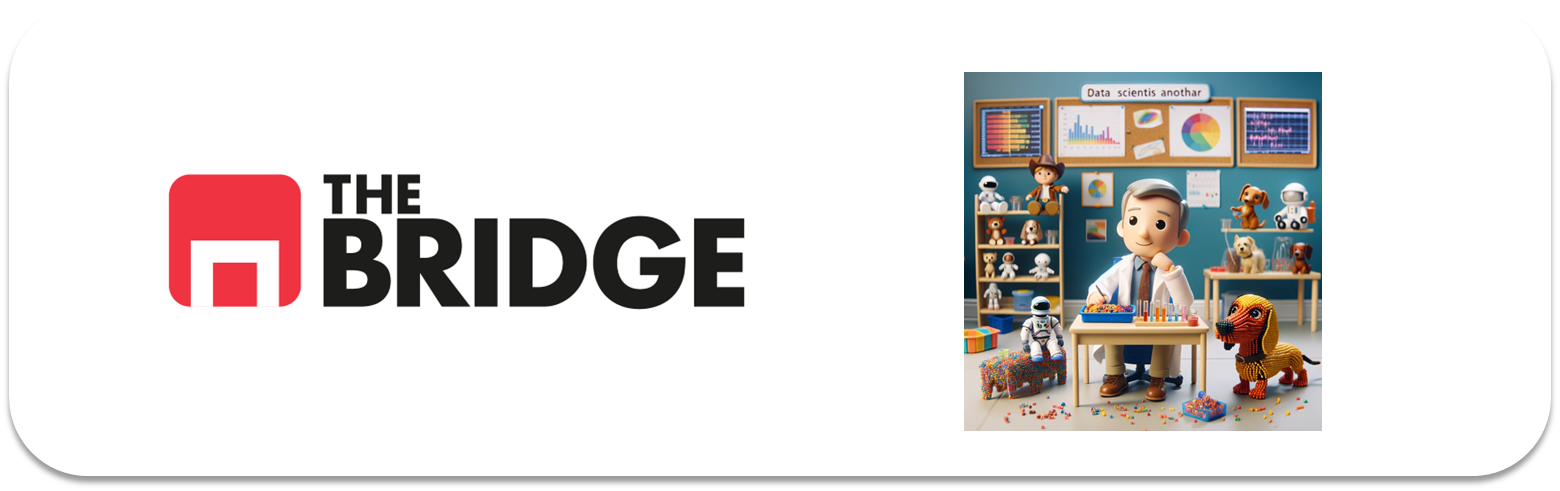

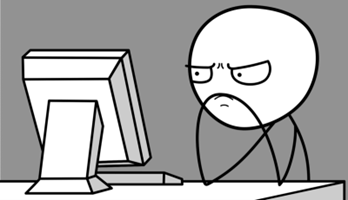

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
from bootcampviztools import *
import numpy as np
import pandas as pd

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [2]:
df_admission = pd.read_csv('./data/admission_data.csv', index_col=0)
df_admission.head()

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


In [3]:
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12763 entries, 0 to 12762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       12763 non-null  int64 
 1   Major      12763 non-null  object
 2   Gender     12763 non-null  object
 3   Admission  12763 non-null  object
dtypes: int64(1), object(3)
memory usage: 498.6+ KB


### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

In [5]:
df_admission.Year.value_counts() # variable a descartar debido a que es única, podría ser parte del nombre del dataframe

Year
1973    12763
Name: count, dtype: int64

### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

In [9]:
pd.DataFrame([df_admission.Major.value_counts(), df_admission.Major.value_counts(normalize = True)*100]).T

,count,proportion
Major,,
Other,7924.0,62.085717
Department of Physics and Astronomy,1246.0,9.762595
School of Medicine,918.0,7.192666
Department of Mechanical Engineering,792.0,6.205438
Department of Psychology,714.0,5.594296
Department of Economics,585.0,4.583562
School of Political Science and International Relations,584.0,4.575727


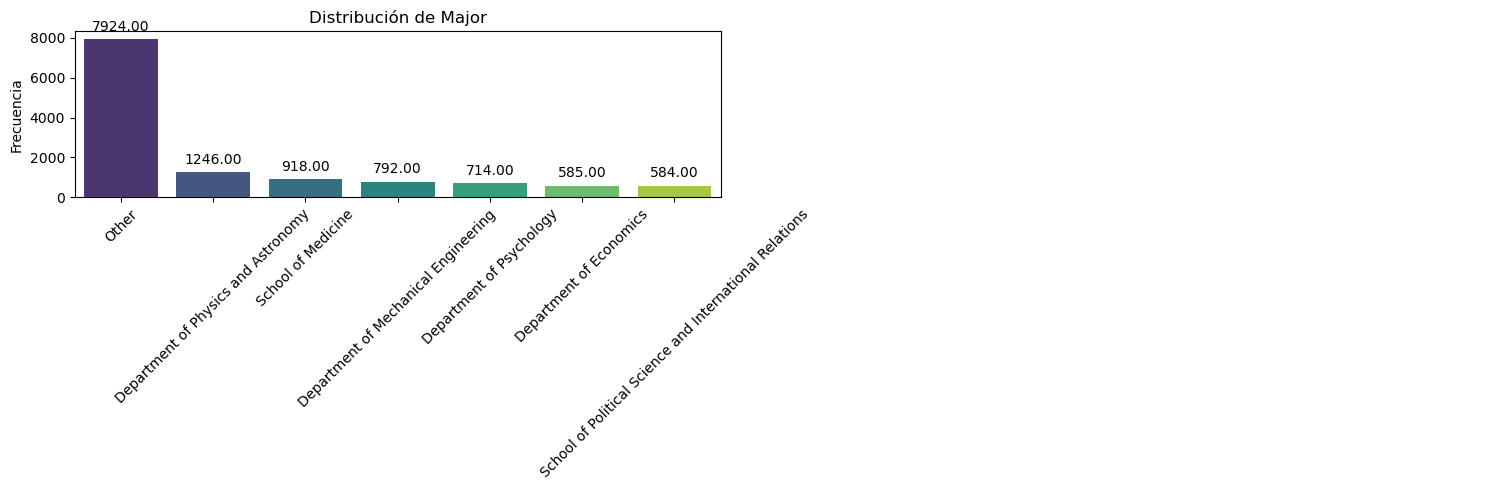

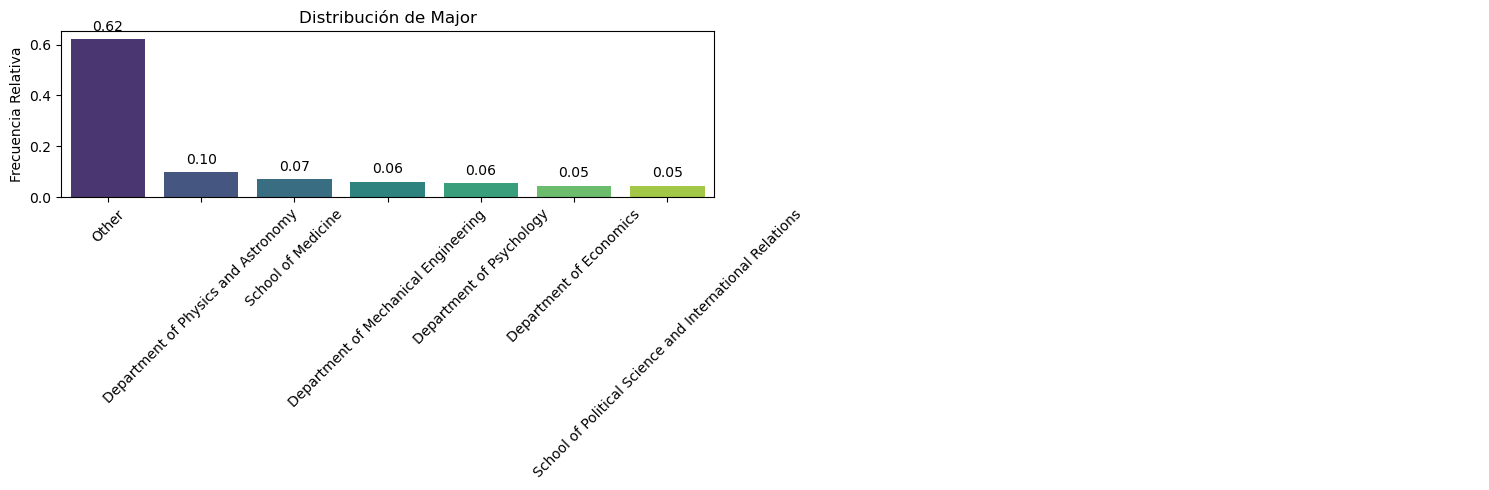

In [14]:
pinta_distribucion_categoricas(df_admission, ['Major'],mostrar_valores=True)
pinta_distribucion_categoricas(df_admission, ['Major'],mostrar_valores=True, relativa = True)

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

*La mayor parte de admisiones se dispersa en facultades varias (Otras), aunque las facultades a estudiar se ditribuyen el número de admisiones de forma más o menos homogénea*

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [16]:
pd.DataFrame([df_admission.Gender.value_counts(),df_admission.Gender.value_counts(normalize=True)*100]).T

,count,proportion
Gender,,
M,8442.0,66.144323
F,4321.0,33.855677


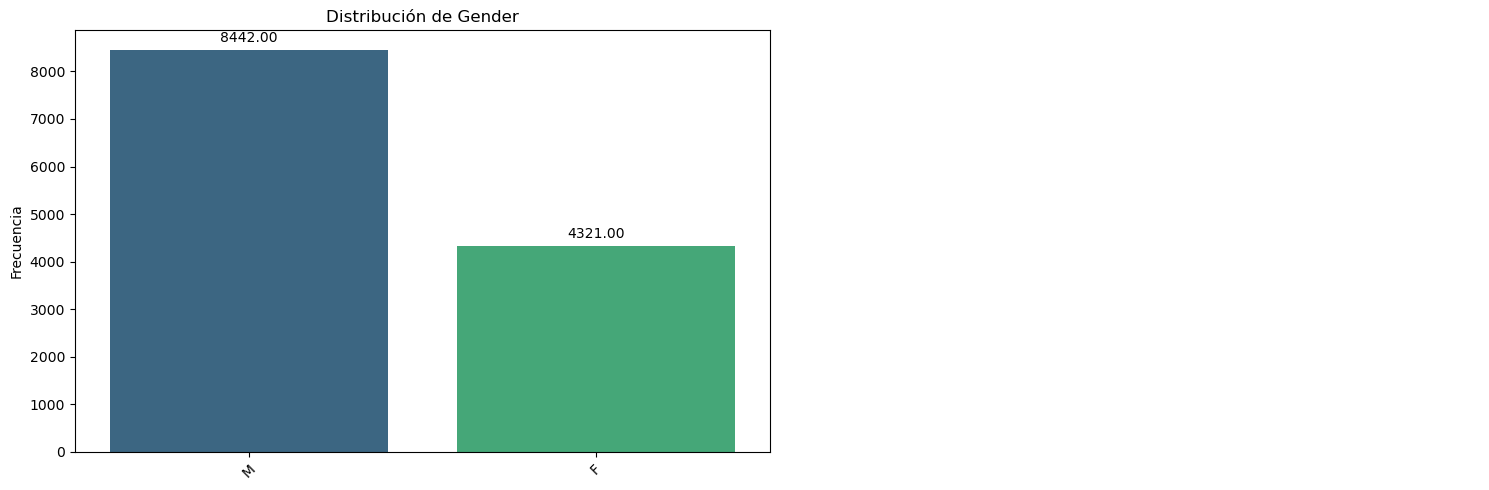

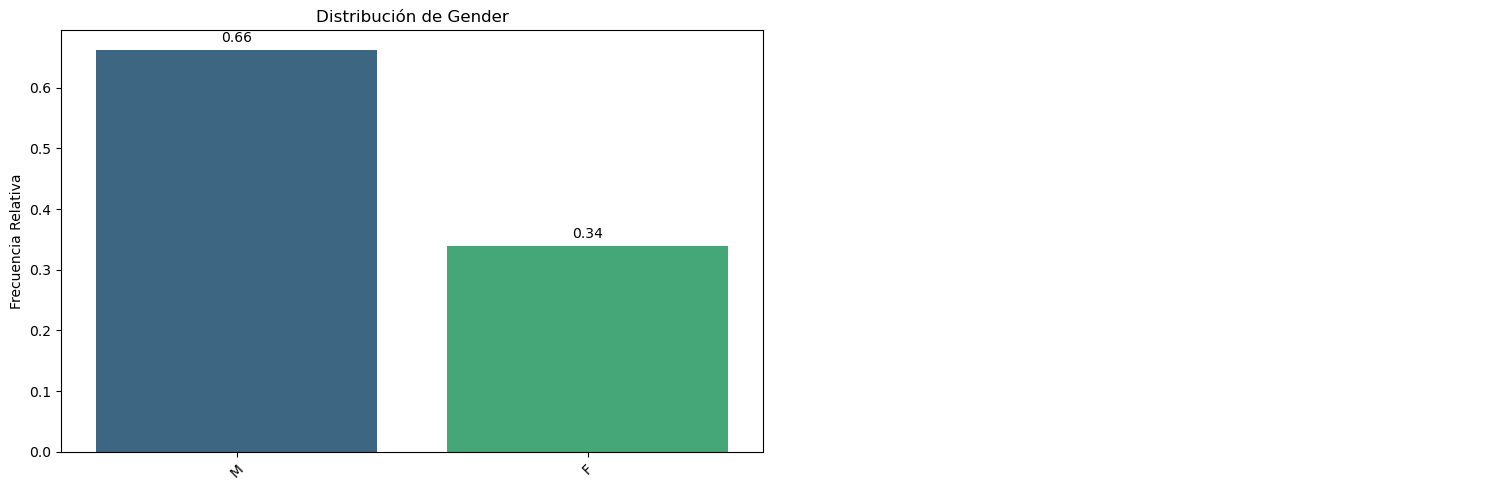

In [17]:
pinta_distribucion_categoricas(df_admission, ['Gender'],mostrar_valores=True)
pinta_distribucion_categoricas(df_admission, ['Gender'],mostrar_valores=True, relativa = True)

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

*Llegan a la universidad el doble de peticiones de admisión de hombres que de mujeres*

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [18]:
pd.DataFrame([df_admission.Admission.value_counts(),df_admission.Admission.value_counts(normalize=True)*100]).T

,count,proportion
Admission,,
Rejected,7531.0,59.006503
Accepted,5232.0,40.993497


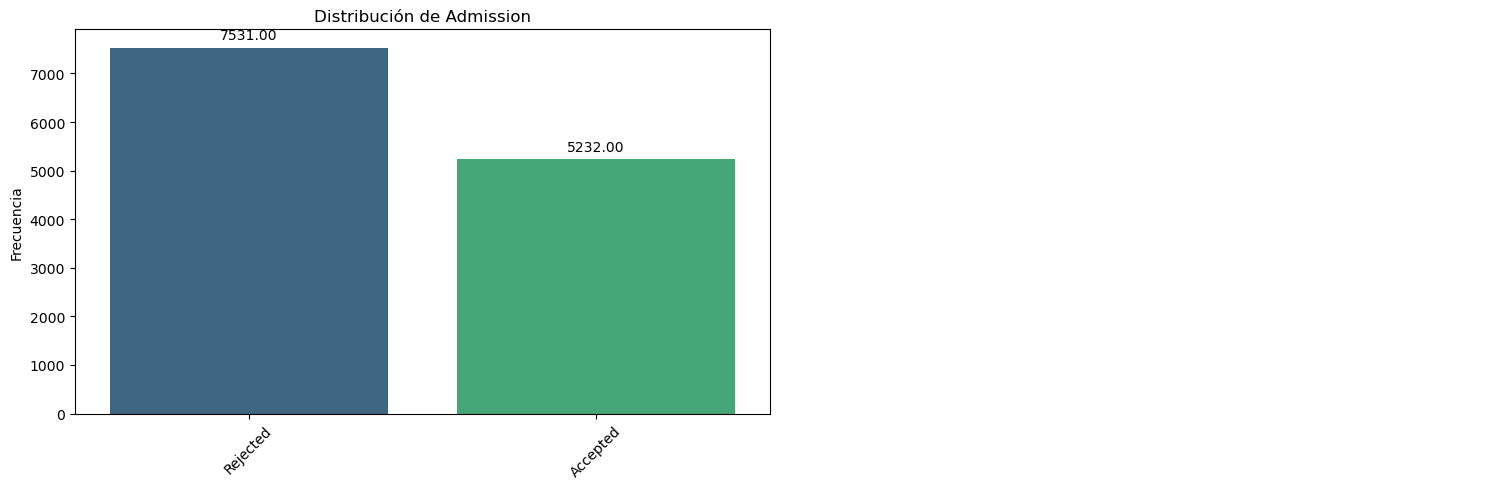

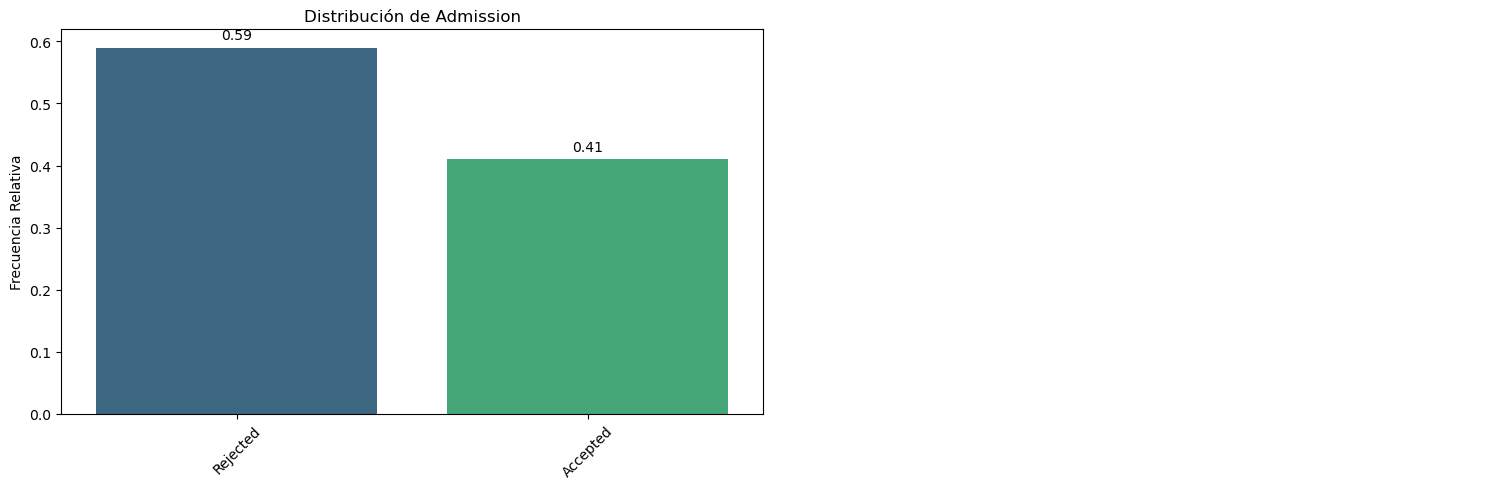

In [19]:
pinta_distribucion_categoricas(df_admission, ['Admission'],mostrar_valores=True)
pinta_distribucion_categoricas(df_admission, ['Admission'],mostrar_valores=True, relativa = True)

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

*Aunque la mayor parte de las solicitudes se deniegan, se aceptan un 40%, por lo que parece que hay un cierto criterio de selección*


### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [3]:
df_tips = pd.read_csv('./data/tips.csv', index_col = 0)
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [36]:
var_numericas = df_tips.describe().keys().to_list()
var_numericas

['total_bill', 'tip', 'size']

In [61]:
resumen = df_tips.describe().round(2).T.rename(columns = {'mean':'media','50%':'mediana','25%':'q1','75%':'q3'})
resumen['rango'] = resumen['max'] - resumen['min']
resumen[['media','mediana','q1','q3','rango']]

,media,mediana,q1,q3,rango
total_bill,19.79,17.8,13.35,24.13,47.74
tip,3.00,2.9,2.00,3.56,9.00
size,2.57,2.0,2.00,3.00,5.00


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

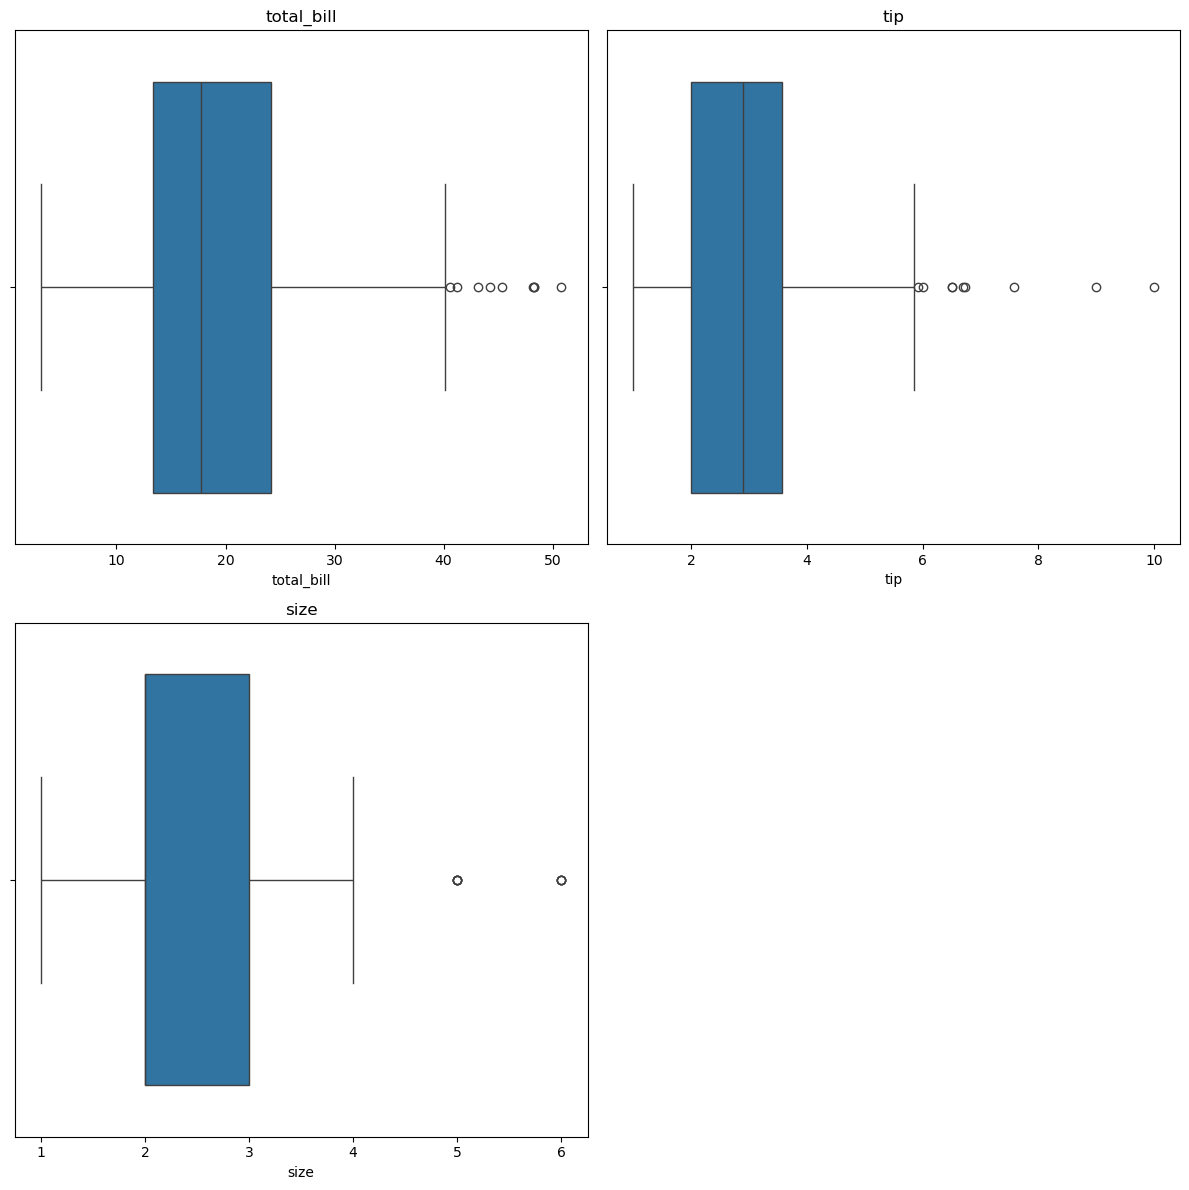

In [52]:
plot_multiple_boxplots(df_tips, var_numericas)

### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

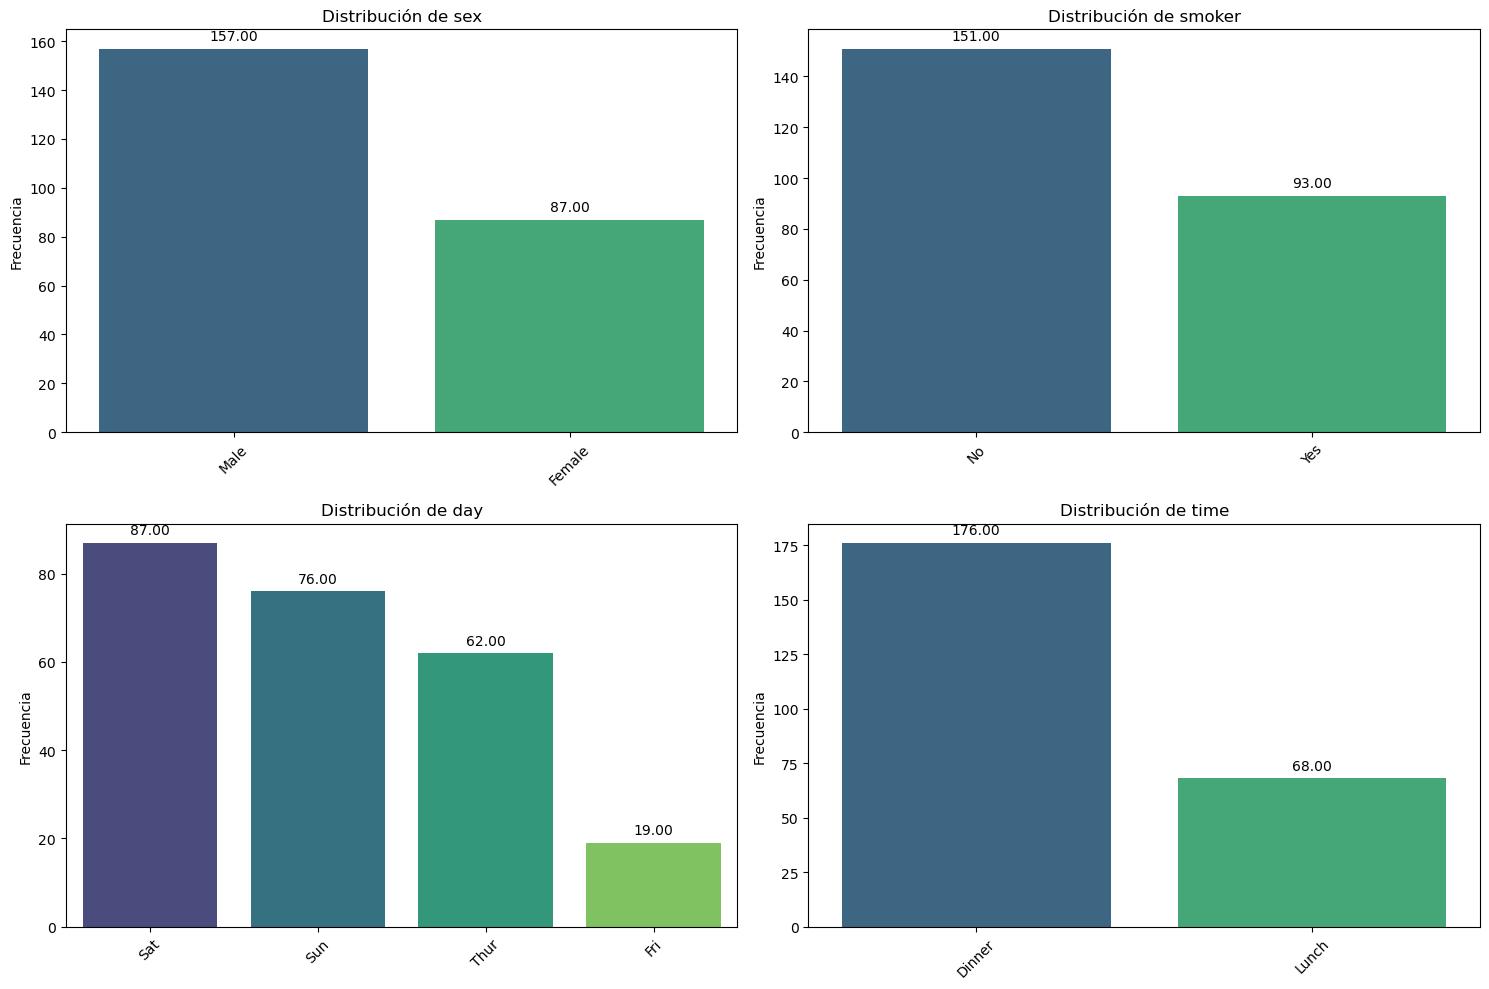

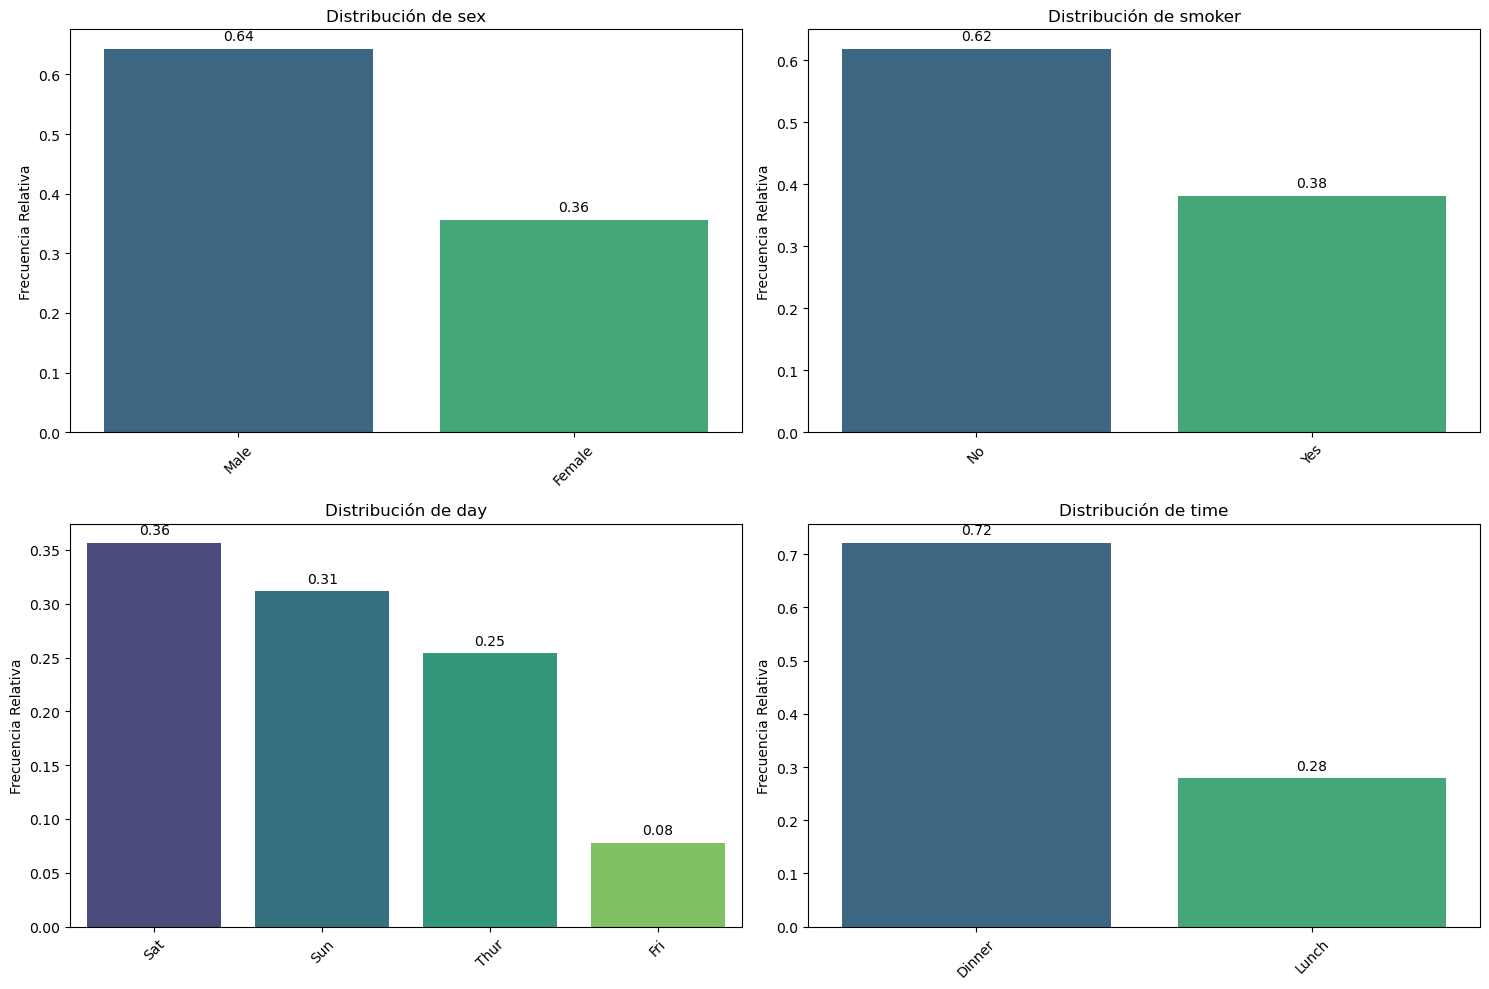

In [4]:
variables_categoricas = ['sex','smoker','day','time']

pinta_distribucion_categoricas(df_tips, variables_categoricas,mostrar_valores=True)
pinta_distribucion_categoricas(df_tips, variables_categoricas,mostrar_valores=True, relativa = True)

*En general la mayor parte de propinas son de hombres fumadores. Habría que ver la relación entre dia y comida ('time').*

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)
